### Project:MNIST HandWrittern Digit Recognition

In [1]:
from sklearn.datasets import fetch_openml
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

import numpy as np
import matplotlib.pyplot as plt
import pickle

### Load data

In [2]:
mnist = fetch_openml('mnist_784')  #28*28=784

In [3]:
X = mnist.data
y = mnist.target

In [4]:
X.shape

(70000, 784)

In [ ]:
for i in range(10):
    plt.subplot(4,3,i+1)
    x = X[y==str(i)][0]
    plt.imshow(x.reshape(28,28),cmap='gray')
    plt.axis('off')
plt.show()

In [6]:
X.shape

(70000, 784)

In [7]:
y.shape

(70000,)

In [8]:
print(np.unique(y))

['0' '1' '2' '3' '4' '5' '6' '7' '8' '9']


In [9]:
np.bincount(y.astype(int))

array([6903, 7877, 6990, 7141, 6824, 6313, 6876, 7293, 6825, 6958],
      dtype=int64)

In [10]:
### Because of lot of samples ,i have taken only two classes(0,2)

In [11]:
X1 = X[(y=='0')|(y=='2')]
y1 = y[(y=='0')|(y=='2')]

In [ ]:
plt.imshow(X1[4].reshape(28,28),cmap='gray')
plt.show()

In [13]:
X1.shape

(13893, 784)

In [14]:
np.unique(y1)

array(['0', '2'], dtype=object)

### Split data

In [15]:
xtrain,xtest,ytrain,ytest = train_test_split(X1,y1,test_size=.2,random_state=10)

In [16]:
xtrain.shape

(11114, 784)

In [17]:
xtest.shape

(2779, 784)

In [18]:
xtrain.max()

pixel1      0.0
pixel2      0.0
pixel3      0.0
pixel4      0.0
pixel5      0.0
           ... 
pixel780    0.0
pixel781    0.0
pixel782    0.0
pixel783    0.0
pixel784    0.0
Length: 784, dtype: float64

### feature scaling

In [19]:
x_train = xtrain/255.0

x_test = xtest/255.0

In [20]:
x_train.min()

pixel1      0.0
pixel2      0.0
pixel3      0.0
pixel4      0.0
pixel5      0.0
           ... 
pixel780    0.0
pixel781    0.0
pixel782    0.0
pixel783    0.0
pixel784    0.0
Length: 784, dtype: float64

In [21]:
x_train.max()

pixel1      0.0
pixel2      0.0
pixel3      0.0
pixel4      0.0
pixel5      0.0
           ... 
pixel780    0.0
pixel781    0.0
pixel782    0.0
pixel783    0.0
pixel784    0.0
Length: 784, dtype: float64

### PCA Implementation

In [22]:
pca = PCA(n_components=.97)

In [23]:
pca_train = pca.fit_transform(x_train)

pca_test = pca.transform(x_test)

In [24]:
pca_train.shape

(11114, 189)

In [25]:
pca_test.shape

(2779, 189)

In [26]:
### save pca

In [27]:
f = open('pca.pkl','wb')
pickle.dump(pca,f)
f.close()

### Building and Training model

In [28]:
model = LogisticRegression(solver='saga',max_iter=1000)

model.fit(pca_train,ytrain)

test_score = model.score(pca_test,ytest)

train_score = model.score(pca_train,ytrain)

In [29]:
train_score

0.9946913802411373

In [30]:
test_score

0.9899244332493703

In [31]:
### save model

In [32]:
f = open('log.pkl','wb')
pickle.dump(model,f)
f.close()

In [33]:

#svm_model = SVC(kernel='rbf',gamma=.1)

#svm_model.fit(pca_train,ytrain)

#svm_test_score = svm_model.score(pca_test,ytest)

#svm_train_score = svm_model.score(pca_train,ytrain)

In [34]:
#svm_test_score

In [35]:
#svm_train_score

### Test model

In [36]:
### load model

In [37]:
f = open('log.pkl','rb')
model = pickle.load(f)
f.close()

In [38]:
### load pca

In [39]:
f = open('pca.pkl','rb')
pca=pickle.load(f)
f.close()

In [40]:
import cv2

In [41]:
img = cv2.imread('test_images/t5.png',0)

In [42]:
img.ndim

2

In [43]:
img.shape

(199, 179)

In [44]:
img1 = cv2.resize(img,(28,28))

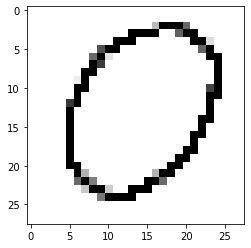

In [45]:
plt.imshow(img1,cmap='gray')
plt.show()

In [46]:
img2 = np.invert(img1) 

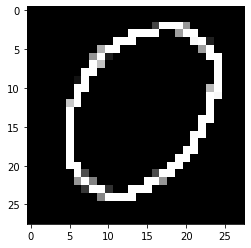

In [47]:
plt.imshow(img2,cmap='gray')
plt.show()

In [48]:
img2.max()

255

In [49]:
img2 = img2/255

In [50]:
img2.shape

(28, 28)

In [51]:
test = img2.reshape(1,-1)

In [52]:
t1 = pca.transform(test)

In [53]:
t1.shape

(1, 189)

In [54]:
pred = model.predict(t1)

print(pred)

['0']
